Example taken from : https://github.com/dask/dask-examples/blob/main/delayed.ipynb

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from time import sleep
import numpy as np

from dask4in2p3.dask4in2p3 import Dask4in2p3
import dask

# Creating a Dask4in2p3 object  (with a default Python virtual environment)
dask4in2p3 = Dask4in2p3()

client = dask4in2p3.new_client(dask_worker_jobs=10, 
                               dask_worker_partition='dask',
                               dask_worker_memory=3,
                               dask_worker_time='00:30:00',
                               wait_for_workers_timeout=300
                              )

15:55:18,910 INFO    Creating and launching the SLURM jobs(s)
15:55:19,035 INFO    Waiting for the dask-scheduler SLURM job to be in RUNNING status
15:55:29,210 INFO    I've got the dask-scheduler SLURM job in RUNNING status
15:55:29,212 INFO    Waiting for the dask-worker SLURM job(s) to be in RUNNING status
15:55:44,314 INFO    I've got the expected count (=10) dask-worker SLURM job(s) in RUNNING status
15:55:59,230 INFO    A Dask client has been provided


In [21]:
client

Connection method: Scheduler file,Scheduler file: ./etc/scheduler_info.json
Dashboard: /proxy/ccwslurm0001:65470,
Comm: tls://134.158.170.15:65485,Workers: 0
Dashboard: /proxy/ccwslurm0001:65470,Total threads: 0
Started: 32 minutes ago,Total memory: 0 B


In [2]:
import time
import random

def inc(x):
    time.sleep(random.random())
    return x + 1

def dec(x):
    time.sleep(random.random())
    return x - 1
    
def add(x, y):
    time.sleep(random.random())
    return x + y 

In [3]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 1.41 ms, sys: 2.6 ms, total: 4.01 ms
Wall time: 1.43 s


3

In [4]:
%%time
zs = []
for i in range(10):
    x = inc(i)
    y = dec(x)
    z = add(x, y)
    zs.append(z)
zs

CPU times: user 22.6 ms, sys: 183 µs, total: 22.8 ms
Wall time: 15.2 s


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [5]:
import time
import random

@dask.delayed
def inc(x):
    time.sleep(random.random())
    return x + 1

@dask.delayed
def dec(x):
    time.sleep(random.random())
    return x - 1

@dask.delayed
def add(x, y):
    time.sleep(random.random())
    return x + y 

In [6]:
x = inc(1)
y = dec(2)
z = add(x, y)

In [7]:
z

Delayed('add-b954d988-b2cf-448e-9dd3-b728d2da3cd9')

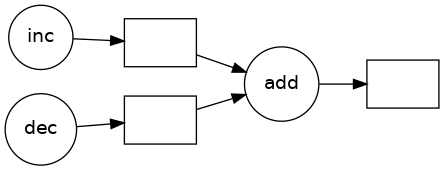

In [8]:
z.visualize(rankdir='LR')

In [9]:
%%time
z.compute()

CPU times: user 153 ms, sys: 99.1 ms, total: 252 ms
Wall time: 2.46 s


3

In [10]:
%%time
zs = []
for i in range(256):
    x = inc(i)
    y = dec(x)
    z = add(x, y)
    zs.append(z)

CPU times: user 57.4 ms, sys: 7.97 ms, total: 65.4 ms
Wall time: 57.2 ms


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.8486 to fit


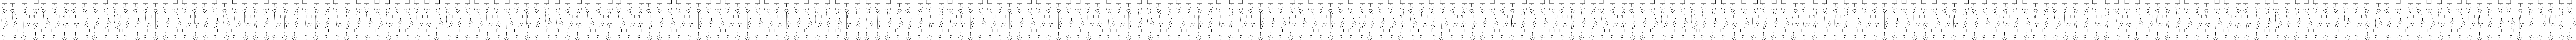

In [11]:
dask.visualize(zs)

In [12]:
%%time
zs = dask.persist(*zs)

CPU times: user 169 ms, sys: 4.39 ms, total: 173 ms
Wall time: 169 ms


In [14]:
%%time
L = zs
while len(L) > 1:
    new_L = []
    for i in range(0, len(L), 2):
        lazy = add(L[i], L[i + 1])  # add neighbors
        new_L.append(lazy)
    L = new_L                       # swap old list for new

CPU times: user 29 ms, sys: 16.6 ms, total: 45.6 ms
Wall time: 30.1 ms


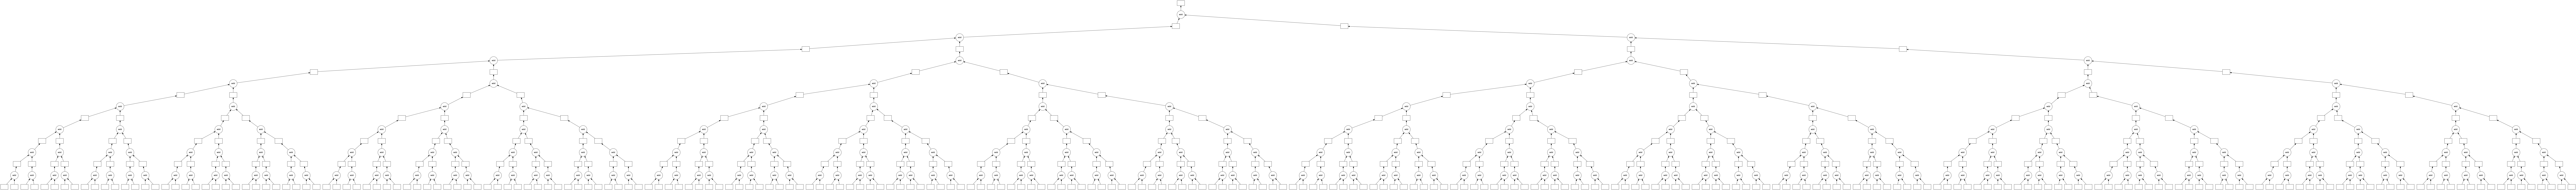

In [15]:
dask.visualize(L, optimize_graph=True)

In [16]:
%%time
dask.compute(L)

CPU times: user 114 ms, sys: 5.88 ms, total: 120 ms
Wall time: 14.9 s


([65536],)

In [17]:
client.close()